<a href="https://colab.research.google.com/github/BariBariGood/Brain-Disease-Classifier/blob/main/Brain_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

check if wifi is working lol

In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

^C
ERROR: Operation cancelled by user


In [ ]:
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastcore.all import *
import time
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *
import pathlib

installing/upgrading libraries (duckduckgo/kaggle)

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

method for searching images using duckduckgo (search engine)

In [ ]:
urls = search_images('parkinsons radiology', max_images = 1)
urls[0]

Searching for 'parkinsons radiology'


'https://www.neurologyadvisor.com/wp-content/uploads/sites/10/2018/12/axialsectionnormalbrainmi_1293419.png'

searches for a bird photo and downloads a URL

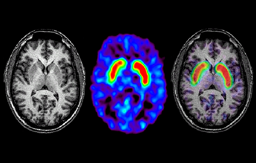

In [ ]:
from fastdownload import download_url
dest = 'parkinsons.jpg'
download_url(urls[0], dest, show_progress = False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

displays previously downloaded image

Searching for 'bw alzheimers radiology'


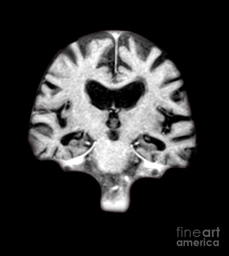

In [ ]:
download_url(search_images('bw alzheimers radiology', max_images = 1)[0], 'alzheimers.jpg', show_progress = False)
Image.open('alzheimers.jpg').to_thumb(256, 256)

Similar process but for leafs.
1) downloads the URL for the seached Leaf photo

2) labels it 'leaf.jpg'

3) opens the labeled image 'leaf.jpg' then displays a resized thumbnail

In [ ]:
searches = 'healthy brain', 'alzheimers', 'dementia', 'parkinsons', 'brain tumor'
path = Path('brain_types')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok = True, parents = True)
    download_images(dest, urls = search_images(f'bw {o} radiology'))
    sleep(15)
    resize_images(path/o, max_size = 400, dest = path/o)


Searching for 'bw healthy brain radiology'
Searching for 'bw alzheimers radiology'
Searching for 'bw dementia radiology'
Searching for 'bw parkinsons radiology'
Searching for 'bw brain tumor radiology'


Searches seem to be good in previous block.
Here, we are downloading the images using the 'search_images' method we made earlier, utilizing DuckDuckGo.
We are also downloading a range of images by specifing different types of search queries.
We make it sleep for 10 seconds so that it doesn't overload the server.
Images are then resized to have a max size of 400px.

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

Some photos might not download correctly.
In order to prevent the model training from failing, we remove corrupted images by unlinking them from the path.

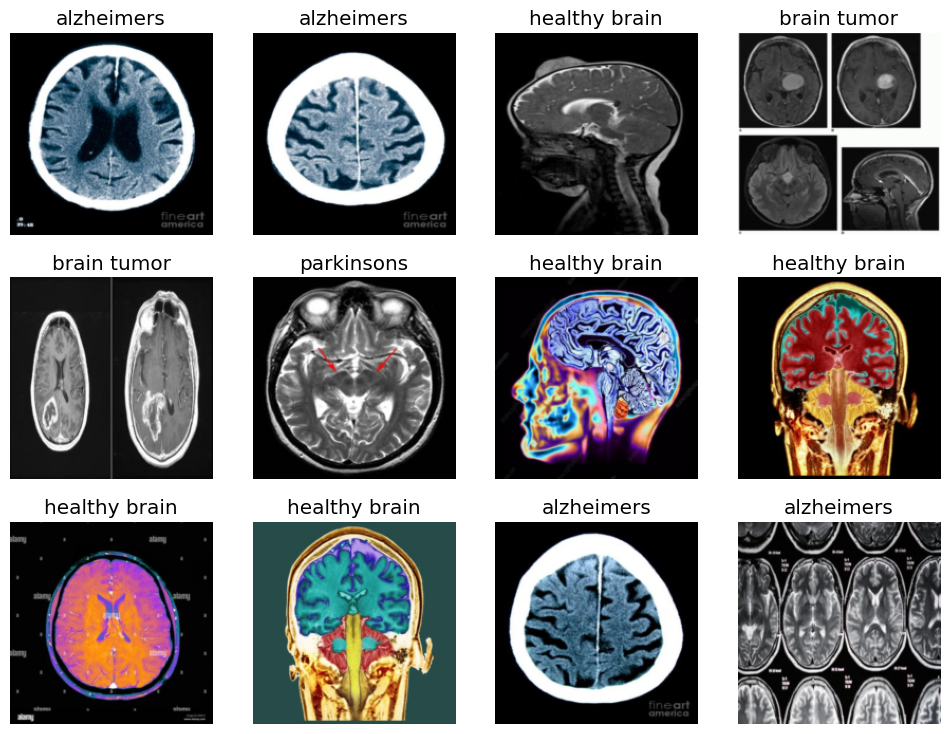

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    #creats blocks between images and categories
    get_items =  get_image_files,
    # gets previously downloaded images
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    # sets aside 20% of the data to create the validation set
    get_y = parent_label,
    # gets the parent label from the search in order to 'block' the data into their respective categories.
    item_tfms = [Resize(192, method='squish')]
    # photos are resized/squished to 192 pixels
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In order to train the model, we use DataLoaders, objects containing the trainingset and a validation set.

In [ ]:
learn = vision_learner(dls, resnet18, metrics = [error_rate, accuracy])
learn.fine_tune(25)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.369415,2.256262,0.743590,0.256410,00:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.466467,1.696402,0.615385,0.384615,00:02
1,1.162623,1.153887,0.358974,0.641026,00:02
2,0.935963,0.751709,0.230769,0.769231,00:02
3,0.780884,0.475015,0.153846,0.846154,00:02
4,0.654188,0.347782,0.153846,0.846154,00:02
5,0.547123,0.283532,0.128205,0.871795,00:02
6,0.458655,0.261797,0.128205,0.871795,00:02
7,0.387507,0.254971,0.128205,0.871795,00:02
8,0.333520,0.237587,0.128205,0.871795,00:02
9,0.288815,0.244655,0.128205,0.871795,00:02


These two simple lines train the model.
Since the wifi at school sucks and I'm using a mac, we'll train the data using the cpu! It trains surprisingly quick.
resnet18 is a very popular computer vision model. Since resnet18 is a previously trained model, rather than building one from scratch, we can just use the prewritten architecture and 'fine_tune(x times)' it according to our dataset.

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the pretrained model), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in imagenet, and widely-used computer vision dataset with images covering 1000 categories)

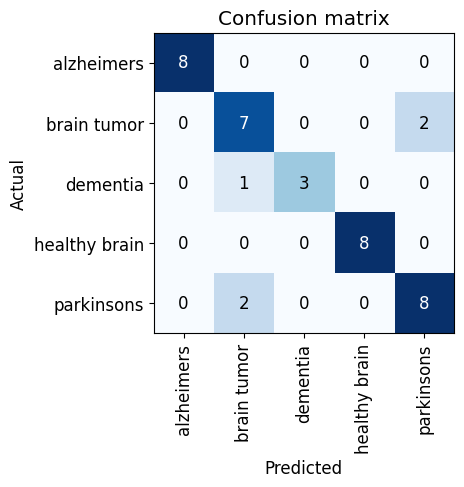

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

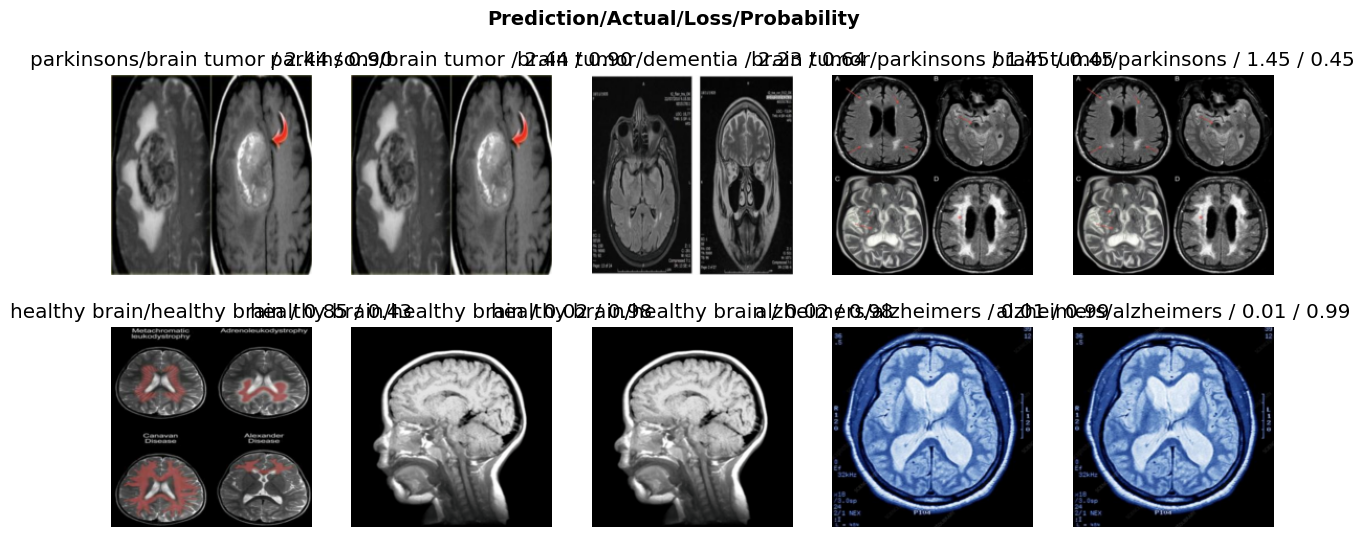

In [ ]:
interp.plot_top_losses(10, nrows=2)

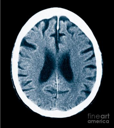

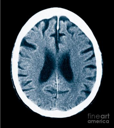

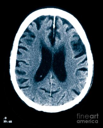

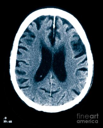

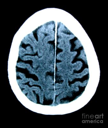

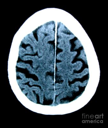

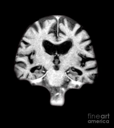

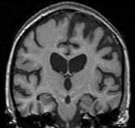

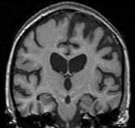

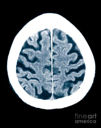

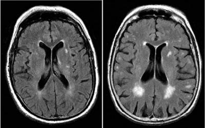

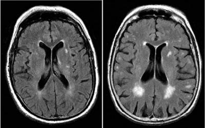

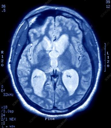

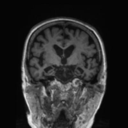

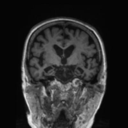

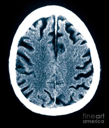

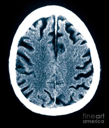

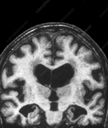

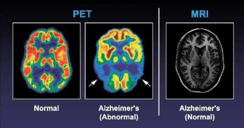

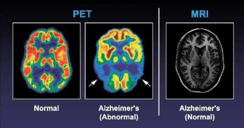

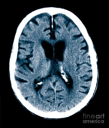

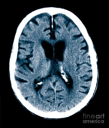

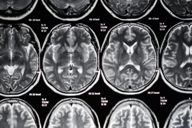

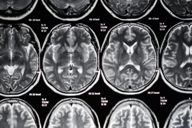

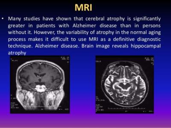

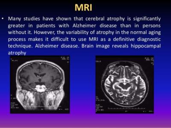

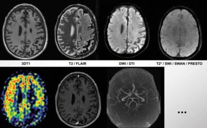

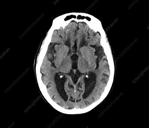

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

its pretty good! but we can do better... lets clean it up!

This is a: alzheimers.
Probability it's alzheimers: 0.9998


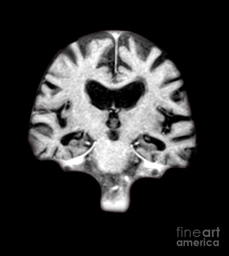

In [ ]:
is_brain,_,probs = learn.predict(PILImage.create('alzheimers.jpg'))
print(f"This is a: {is_brain}.")
print(f"Probability it's alzheimers: {probs[0]:.4f}")
Image.open('alzheimers.jpg').to_thumb(256, 256)

nice! we got an avg accuracy is 82%! which is pretty high given that our dataset is not that good.